In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_brownien_motion(x0 = 0, mean = 0, t0 = 0, T = 1, delta_t = 0.01 ):

    t = np.arange(t0,T, delta_t) # time axis

    delta_y = np.random.normal(loc = mean, scale = np.sqrt(delta_t), size=len(t)-1) 

    y = np.zeros(len(t))
    y[0] = x0
    temp = 0
    for i in range(y.shape[0]-1):
        y[i+1] = y[i] + delta_y[i] 

    return t, y

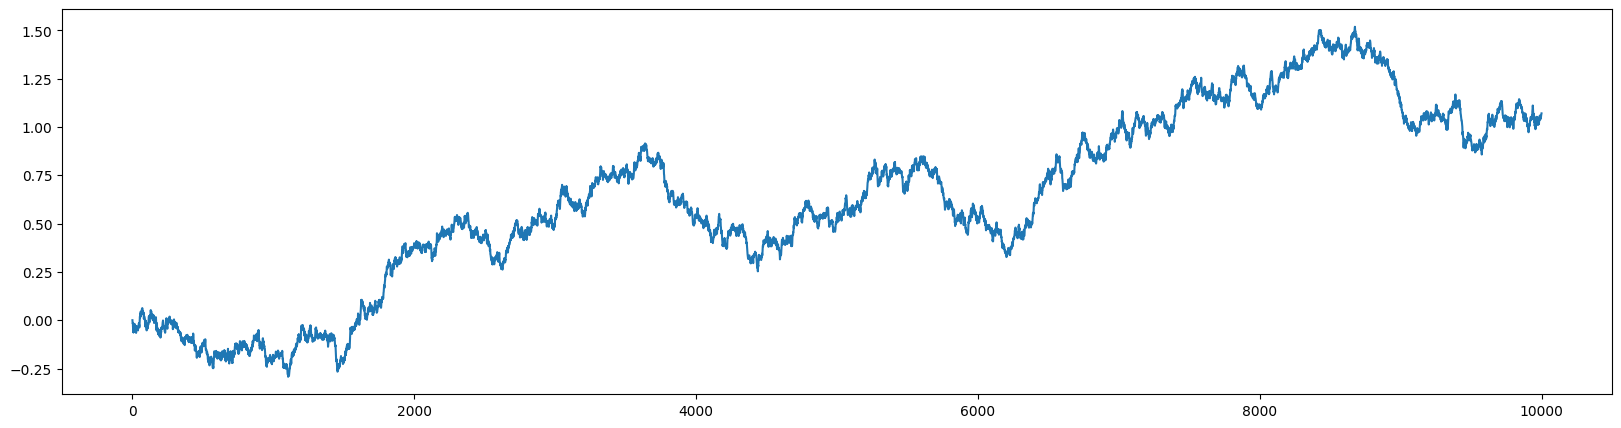

In [3]:
t, y = simulate_brownien_motion(delta_t = 0.0001)
plt.figure(figsize=(20,5)) 
plt.plot(y)

### The paper deals with diffusion first exit times : 
The fisrt time a stochastic process exits a given domain (real interval in case of unidimensionnal process)
As this is random, the objective is to simulate the distribution of this first time exit.

**The purpose of the paper is to highlight an acceleration procedure for <br> the GDET-algorithm based
on a multi-armed bandit model.**

Let's see some examples related to first time exits from [0, 0.01]

In [14]:
#interval [a, b]
a = 0
b = 0.01
Tmax = 1

# simulate brownien motion
t, y = simulate_brownien_motion(t0 = a , T = Tmax, delta_t = 0.0001)

if len(y[(y > b) + (y < a )]) > 0:
    first_time_exit = t[(y > b) + (y < a )][0]
    y_first_time_exit = y[(y > b) + (y < a )][0]
    print(f" first time exit : {first_time_exit}, with y = {y_first_time_exit}")
else:
    print("No exist time !")

 first time exit : 0.00030000000000000003, with y = 0.024531775486048304


$$
dX_{t} = \mu(X_{t}).dt + \sigma(X_{t}).dB_{t}, \space X_{0} = x \space \epsilon \space (a, b)

$$

In [ ]:
def CONVERGENT_SERIES_METHOD():
    return 0


In [7]:
def CONDTIONAL_DISTR(x, a, b , t):
    """
        x : starting point of the brownien motion
        a, b : endpoints of the interval of interest
        t : time
    """

    return 0

In [ ]:
def BROWNIAN_EXIT_SYMMETRIC():
    return 0

In [ ]:
def BROWNIAN_EXIT_ASYMM(x, a, b):
    return 0

Due to both the translation invariance and the scaling
property of the Brownian motion, it suffices  to study time exit from [-1, 1] given that : 
$$ B_{0} = x \space \epsilon [-1, 1] $$